In [148]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dfGeneModel = pd.read_csv('./GCF_001654055.1_ASM165405v1_genomic.gff.gz', compression='gzip', sep='\t', comment='#',header=None)

In [4]:
dfGeneModel.head(10)

,0,1,2,3,4,5,6,7,8
0,NW_018745690.1,RefSeq,region,1,6409783,.,+,.,ID=NW_018745690.1:1..6409783;Dbxref=taxon:3981...
1,NW_018745690.1,Gnomon,gene,368962,379049,.,+,.,ID=gene-LOC110654056;Dbxref=GeneID:110654056;N...
2,NW_018745690.1,Gnomon,mRNA,368962,379049,.,+,.,ID=rna-XM_021809960.1;Parent=gene-LOC110654056...
3,NW_018745690.1,Gnomon,exon,368962,369344,.,+,.,ID=exon-XM_021809960.1-1;Parent=rna-XM_0218099...
4,NW_018745690.1,Gnomon,exon,371578,371797,.,+,.,ID=exon-XM_021809960.1-2;Parent=rna-XM_0218099...
5,NW_018745690.1,Gnomon,exon,371951,372662,.,+,.,ID=exon-XM_021809960.1-3;Parent=rna-XM_0218099...
6,NW_018745690.1,Gnomon,exon,378817,379049,.,+,.,ID=exon-XM_021809960.1-4;Parent=rna-XM_0218099...
7,NW_018745690.1,Gnomon,CDS,368962,369344,.,+,0,ID=cds-XP_021665652.1;Parent=rna-XM_021809960....
8,NW_018745690.1,Gnomon,CDS,371578,371797,.,+,1,ID=cds-XP_021665652.1;Parent=rna-XM_021809960....
9,NW_018745690.1,Gnomon,CDS,371951,372662,.,+,0,ID=cds-XP_021665652.1;Parent=rna-XM_021809960....


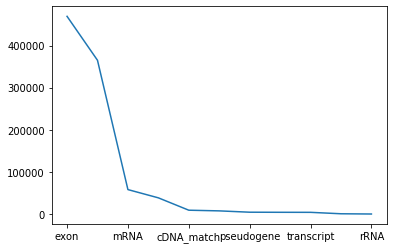

In [5]:
dfGeneModel[2].value_counts().plot()

In [6]:
# 38,000 genes
# 5,000 mRNAs for 1.3 Gb genome (rubber tree)

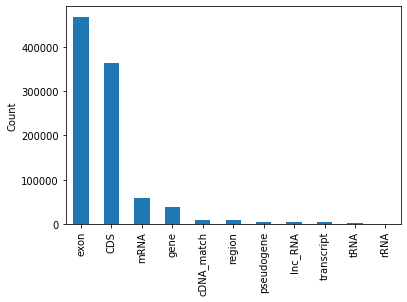

In [7]:
dfGeneModel[2].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.savefig("Rubber_tree_genemodel_componenet_count.png", dpi=200, bbox_inches='tight')

In [8]:
m = dfGeneModel[2] =='lnc_RNA'

In [9]:
m

0         False
1         False
2         False
3         False
4         False
          ...  
960133    False
960134    False
960135    False
960136    False
960137    False
Name: 2, Length: 960138, dtype: bool

In [10]:
dfGeneModel[m].shape

(4081, 9)

In [11]:
dfGeneModelLncRNA = dfGeneModel[m]

In [12]:
dfGeneModelLncRNA

,0,1,2,3,4,5,6,7,8
194,NW_018745690.1,Gnomon,lnc_RNA,421973,424021,.,-,.,ID=rna-XR_002494566.1;Parent=gene-LOC110652099...
547,NW_018745690.1,Gnomon,lnc_RNA,2689921,2699060,.,-,.,ID=rna-XR_002498016.1;Parent=gene-LOC110670825...
551,NW_018745690.1,Gnomon,lnc_RNA,2696622,2699060,.,-,.,ID=rna-XR_002498073.1;Parent=gene-LOC110670825...
1060,NW_018745690.1,Gnomon,lnc_RNA,3912887,3915293,.,-,.,ID=rna-XR_002491419.1;Parent=gene-LOC110636325...
1064,NW_018745690.1,Gnomon,lnc_RNA,3913892,3915293,.,-,.,ID=rna-XR_002491361.1;Parent=gene-LOC110636325...
...,...,...,...,...,...,...,...,...,...
959340,NW_018752783.1,Gnomon,lnc_RNA,41,1111,.,+,.,ID=rna-XR_002494544.1;Parent=gene-LOC110653271...
959626,NW_018753006.1,Gnomon,lnc_RNA,1,1035,.,-,.,ID=rna-XR_002494545.1;Parent=gene-LOC110653281...
959630,NW_018753006.1,Gnomon,lnc_RNA,1,1035,.,-,.,ID=rna-XR_002494546.1;Parent=gene-LOC110653281...
959662,NW_018753033.1,Gnomon,lnc_RNA,364,1032,.,-,.,ID=rna-XR_002494547.1;Parent=gene-LOC110653282...


In [13]:
dfGeneModelLncRNA.loc[194][8]

'ID=rna-XR_002494566.1;Parent=gene-LOC110652099;Dbxref=GeneID:110652099,Genbank:XR_002494566.1;Name=XR_002494566.1;gbkey=ncRNA;gene=LOC110652099;model_evidence=Supporting evidence includes similarity to: 100%25 coverage of the annotated genomic feature by RNAseq alignments%2C including 32 samples with support for all annotated introns;product=uncharacterized LOC110652099;transcript_id=XR_002494566.1'

In [14]:
def funInfoParse(x):
    listInfo = []
    for each in x.split(';'):
        listInfo.append(each.split('='))
        return dict(listInfo)

In [15]:
dfGeneModelLncRNA[8].values[0]

'ID=rna-XR_002494566.1;Parent=gene-LOC110652099;Dbxref=GeneID:110652099,Genbank:XR_002494566.1;Name=XR_002494566.1;gbkey=ncRNA;gene=LOC110652099;model_evidence=Supporting evidence includes similarity to: 100%25 coverage of the annotated genomic feature by RNAseq alignments%2C including 32 samples with support for all annotated introns;product=uncharacterized LOC110652099;transcript_id=XR_002494566.1'

In [16]:
dfGeneModelLncRNA[8]

194       ID=rna-XR_002494566.1;Parent=gene-LOC110652099...
547       ID=rna-XR_002498016.1;Parent=gene-LOC110670825...
551       ID=rna-XR_002498073.1;Parent=gene-LOC110670825...
1060      ID=rna-XR_002491419.1;Parent=gene-LOC110636325...
1064      ID=rna-XR_002491361.1;Parent=gene-LOC110636325...
                                ...                        
959340    ID=rna-XR_002494544.1;Parent=gene-LOC110653271...
959626    ID=rna-XR_002494545.1;Parent=gene-LOC110653281...
959630    ID=rna-XR_002494546.1;Parent=gene-LOC110653281...
959662    ID=rna-XR_002494547.1;Parent=gene-LOC110653282...
959684    ID=rna-XR_002494548.1;Parent=gene-LOC110653283...
Name: 8, Length: 4081, dtype: object

In [17]:
dfGeneModelLncRNA[8].apply(funInfoParse)

194       {'ID': 'rna-XR_002494566.1'}
547       {'ID': 'rna-XR_002498016.1'}
551       {'ID': 'rna-XR_002498073.1'}
1060      {'ID': 'rna-XR_002491419.1'}
1064      {'ID': 'rna-XR_002491361.1'}
                      ...             
959340    {'ID': 'rna-XR_002494544.1'}
959626    {'ID': 'rna-XR_002494545.1'}
959630    {'ID': 'rna-XR_002494546.1'}
959662    {'ID': 'rna-XR_002494547.1'}
959684    {'ID': 'rna-XR_002494548.1'}
Name: 8, Length: 4081, dtype: object

In [18]:
dfGeneModelLncRNA['product'] = dfGeneModelLncRNA[8].apply(funInfoParse)

/home/yumi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
dfGeneModelLncRNA.to_csv('rubbertreeLncRNA.csv')

In [20]:
def fasta2dic(filename):
    dic = {}
    f   = open(filename)
    fr  = f.read()
    for each in fr.split('>')[1:]:
        strHeader = each.split('\n')[0].split()[0]
        strSeq    = ''.join(each.split('\n')[1:])
        dic[strHeader] = strSeq
    return dic

In [21]:
dicFa = fasta2dic('./GCF_001654055.1_ASM165405v1_genomic.fna/GCF_001654055.1_ASM165405v1_genomic.fna')

In [22]:
dfGeneModelLncRNA.head()

,0,1,2,3,4,5,6,7,8,product
194,NW_018745690.1,Gnomon,lnc_RNA,421973,424021,.,-,.,ID=rna-XR_002494566.1;Parent=gene-LOC110652099...,{'ID': 'rna-XR_002494566.1'}
547,NW_018745690.1,Gnomon,lnc_RNA,2689921,2699060,.,-,.,ID=rna-XR_002498016.1;Parent=gene-LOC110670825...,{'ID': 'rna-XR_002498016.1'}
551,NW_018745690.1,Gnomon,lnc_RNA,2696622,2699060,.,-,.,ID=rna-XR_002498073.1;Parent=gene-LOC110670825...,{'ID': 'rna-XR_002498073.1'}
1060,NW_018745690.1,Gnomon,lnc_RNA,3912887,3915293,.,-,.,ID=rna-XR_002491419.1;Parent=gene-LOC110636325...,{'ID': 'rna-XR_002491419.1'}
1064,NW_018745690.1,Gnomon,lnc_RNA,3913892,3915293,.,-,.,ID=rna-XR_002491361.1;Parent=gene-LOC110636325...,{'ID': 'rna-XR_002491361.1'}


In [23]:
dicFa['NW_018745690.1'][421973-1:424021]

'CCTCATCACCAGGATTTTTGTCAGGGTGTAGCCGCAAGGCCAACTTATAGTATGCTTTCTTTATTTCCTGTTGAGATGCTGTCCGCTCAACCCCAAGAACCTACAAGAAATGGGTGGTTATTTGCTAAATCTTACTCCAGCAcaacttaaaatttatataatcatGACAAGAGTGAGTAATTGACAGGACAAGATAAAGATAAAAGTAGATTGAAAGATGAACACTTCAAACATTAGCCTAAGCAGACAGCAAGTCAGGAACTACAAAGGAAAGCAAACAGACGTATGTAAATGCAGAATTTTGAAATAGTTGTCACCTACTTAGCAAAATAAGAACCAAAGTGATACAGATCAAAGCAAGGAGATGGCCCCAGCAGGAAACCCAAGGAAACTTAGAGTGTAttttcaaagaaagaagaaaggcacAGCTGCAGCTTCTGGAAATGAAGGGCTGGAAGGGAATTGATTGGAAAAGCAAATTCTATTGGAGAGAATTGCAGAAGGACCATCTGGAGATGCTTCCAACAGAtgggagaaagaaaaagaaaaagaaaaaaaaaagaccaaaGCTCTATAAATAAAACAAGATAGAGAAGGGAATGGTGTGTGTGATTTATACTATGCATCAACAATTTTGCTTGGGCTAGAGGAACTGGTACCTCTGGTTATTTAGAATTCTGTTGTCATTTAATGTGATTTTGTAATAGTGAGCTGAGAGGAGATTGTGAGTATTGCTGAAAAAATTGTTCTGTGAAACTCTTATTTCCACTAATCAATACAATACATTGTTATCGTTCTTTCCAAATTCTTGTTATTCATCCTTTAGTCTATCAATTTGGTCCGACTTGCTGGATCCATCTGGGAGTGACTGCCCAAATCAAGAATGGAAGCTCAAGTGGAAGGGACAAAGAGGTACAAGGCCACATTAAAAGAAGGGTTACTAAAGCTATGCAATAACAGACAACAACAAGACCAAATACTTAATGGTCTTTGGGATGA

In [24]:
dfGeneModelLncRNA['Sequence'] = dfGeneModelLncRNA.apply(lambda x : dicFa[x[0]][x[3]-1:x[4]], axis=1)

/home/yumi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
dfGeneModelLncRNA

,0,1,2,3,4,5,6,7,8,product,Sequence
194,NW_018745690.1,Gnomon,lnc_RNA,421973,424021,.,-,.,ID=rna-XR_002494566.1;Parent=gene-LOC110652099...,{'ID': 'rna-XR_002494566.1'},CCTCATCACCAGGATTTTTGTCAGGGTGTAGCCGCAAGGCCAACTT...
547,NW_018745690.1,Gnomon,lnc_RNA,2689921,2699060,.,-,.,ID=rna-XR_002498016.1;Parent=gene-LOC110670825...,{'ID': 'rna-XR_002498016.1'},tgtgaggtgacacggacactatgcagaactgcaggatggacttacc...
551,NW_018745690.1,Gnomon,lnc_RNA,2696622,2699060,.,-,.,ID=rna-XR_002498073.1;Parent=gene-LOC110670825...,{'ID': 'rna-XR_002498073.1'},atattaaacctaaaagtattatattaaaattaatcgtCAAAATCTC...
1060,NW_018745690.1,Gnomon,lnc_RNA,3912887,3915293,.,-,.,ID=rna-XR_002491419.1;Parent=gene-LOC110636325...,{'ID': 'rna-XR_002491419.1'},tattatttattaaaactgAGTAAGAGAAAGTTTGATTAAATCCAGA...
1064,NW_018745690.1,Gnomon,lnc_RNA,3913892,3915293,.,-,.,ID=rna-XR_002491361.1;Parent=gene-LOC110636325...,{'ID': 'rna-XR_002491361.1'},tttttttttttaaatcaaagaaATTCCACTAtcctaaattaaaaca...
...,...,...,...,...,...,...,...,...,...,...,...
959340,NW_018752783.1,Gnomon,lnc_RNA,41,1111,.,+,.,ID=rna-XR_002494544.1;Parent=gene-LOC110653271...,{'ID': 'rna-XR_002494544.1'},AAATTTTAGACCCAGCCTGCAGCAGCAAATGCTTGACATTAGCCAG...
959626,NW_018753006.1,Gnomon,lnc_RNA,1,1035,.,-,.,ID=rna-XR_002494545.1;Parent=gene-LOC110653281...,{'ID': 'rna-XR_002494545.1'},ttttttttttttttttgtaattcttATATAAGAAAATTGAAGTGGA...
959630,NW_018753006.1,Gnomon,lnc_RNA,1,1035,.,-,.,ID=rna-XR_002494546.1;Parent=gene-LOC110653281...,{'ID': 'rna-XR_002494546.1'},ttttttttttttttttgtaattcttATATAAGAAAATTGAAGTGGA...
959662,NW_018753033.1,Gnomon,lnc_RNA,364,1032,.,-,.,ID=rna-XR_002494547.1;Parent=gene-LOC110653282...,{'ID': 'rna-XR_002494547.1'},GAAGTCAATAACTGATGAGCAAAATCCAAGATTATGCGTCAAGCAT...


In [26]:
dfGeneModelLncRNA.to_csv('rubbertreeLncRNA.csv')

In [27]:
m = dfGeneModel[2] == 'mRNA'

In [28]:
dfGeneModel_mRNA = dfGeneModel[m]

In [29]:
dfGeneModel_mRNA

,0,1,2,3,4,5,6,7,8
2,NW_018745690.1,Gnomon,mRNA,368962,379049,.,+,.,ID=rna-XM_021809960.1;Parent=gene-LOC110654056...
15,NW_018745690.1,Gnomon,mRNA,400840,404532,.,-,.,ID=rna-XM_021810148.1;Parent=gene-LOC110654206...
31,NW_018745690.1,Gnomon,mRNA,408710,409180,.,+,.,ID=rna-XM_021800527.1;Parent=gene-LOC110644283...
35,NW_018745690.1,Gnomon,mRNA,409983,418695,.,-,.,ID=rna-XM_021809421.1;Parent=gene-LOC110631421...
63,NW_018745690.1,Gnomon,mRNA,410194,418918,.,-,.,ID=rna-XM_021830226.1;Parent=gene-LOC110631421...
...,...,...,...,...,...,...,...,...,...
959612,NW_018752996.1,Gnomon,mRNA,674,969,.,+,.,ID=rna-XM_021808835.1;Parent=gene-LOC110653280...
959757,NW_018753120.1,Gnomon,mRNA,16,912,.,-,.,ID=rna-XM_021808838.1;Parent=gene-LOC110653284...
959762,NW_018753120.1,Gnomon,mRNA,16,872,.,-,.,ID=rna-XM_021808837.1;Parent=gene-LOC110653284...
959767,NW_018753120.1,Gnomon,mRNA,16,829,.,-,.,ID=rna-XM_021808836.1;Parent=gene-LOC110653284...


In [30]:
upstream_width = 500 # bases

starting_point = 368962 # using one-based numbering scheme

contig_id = 'NW_018745690.1'

dicFa[contig_id][368962-1] # using zero-based numbering scheme

dicFa[contig_id][368962-1:368962-1+3] # inspect the starting codon : ATG

upstream_sequences = dicFa[contig_id][368962-1-upstream_width:368962-1]

upstream_sequences

'CAAAAATAATTACTTTTTGGGGAtcattttagaaataaaaaatttataaaaactctataaatacctcAATTTATCCACTTAATTCATTCACACTACTCTTAAATTCTCTCcaatctctcaaattttctacacaataatctctctttaattctcaatattctctaaatttttacactttattttttttttacactcataaaaatttcttatatcccattattttattcaataactctattattatttttttatactatcattaaaatttaatattttctttattactctatttttttacatactcataaaaattttcactatctctaatttttaatttaaaattttacactattttttttgtttgcaaatttctttttttttttgttatcttctacacttcttttttcaaatttctagtaccttctattttttgttatctctatactattttttttttcaaattttatcatagtatcattcctttttttttttttgagaaa'

In [31]:
def get_upstream(contig_id, starting_point, end_point, strand, upstream_width = 500):
    
    if strand == '+':
        upstream_sequences = dicFa[contig_id][starting_point-1-upstream_width:starting_point-1]
    else:
        upstream_sequences = getRevComp(dicFa[contig_id][starting_point:starting_point+upstream_width].upper())
    
    return upstream_sequences

In [32]:
starting_point = 404532
contig_id = 'NW_018745690.1'
dicFa[contig_id][starting_point-3:starting_point] =='CAT'

True

In [33]:
dicComp = {'A':'T',
       'T':'A',
       'G':'C',
       'C':'G',
       'N':'N'
      }

In [34]:
test_sequence = "ATGCGCGGGG"

In [35]:
revComp = []
for i in test_sequence[::-1]:
    revComp.append(dicComp[i])

In [36]:
''.join(revComp)

'CCCCGCGCAT'

In [37]:
def getRevComp(seq):
    dicComp = {'A':'T',
       'T':'A',
       'G':'C',
       'C':'G',
       'N':'N'
      }
    revComp = []
    for i in seq[::-1]:
        revComp.append(dicComp[i])
    return ''.join(revComp)
        
    

In [38]:
dfGeneModel_mRNA['Promotoer_region'] = dfGeneModel_mRNA.apply(lambda x: get_upstream(x[0],x[3],x[4],x[6]), axis=1)

/home/yumi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
dfGeneModel_mRNA

,0,1,2,3,4,5,6,7,8,Promotoer_region
2,NW_018745690.1,Gnomon,mRNA,368962,379049,.,+,.,ID=rna-XM_021809960.1;Parent=gene-LOC110654056...,CAAAAATAATTACTTTTTGGGGAtcattttagaaataaaaaattta...
15,NW_018745690.1,Gnomon,mRNA,400840,404532,.,-,.,ID=rna-XM_021810148.1;Parent=gene-LOC110654206...,TCTATCTAAGTTGAGTGACGGTGAATAAAATTTGATCATAAGTTAA...
31,NW_018745690.1,Gnomon,mRNA,408710,409180,.,+,.,ID=rna-XM_021800527.1;Parent=gene-LOC110644283...,ATTGTTGTTAAAATTACtattgagaaaatcacttttttaaatatta...
35,NW_018745690.1,Gnomon,mRNA,409983,418695,.,-,.,ID=rna-XM_021809421.1;Parent=gene-LOC110631421...,ATGCTTGTGGGATGAAGGTGCCAACACCAAGTGAAATTCAATTGCT...
63,NW_018745690.1,Gnomon,mRNA,410194,418918,.,-,.,ID=rna-XM_021830226.1;Parent=gene-LOC110631421...,TCCCTTGATGATAAAAGCTCACCATCACCTATAAATAAACCTTATG...
...,...,...,...,...,...,...,...,...,...,...
959612,NW_018752996.1,Gnomon,mRNA,674,969,.,+,.,ID=rna-XM_021808835.1;Parent=gene-LOC110653280...,TGGTTACAAAGGCTACTCTCAGTAAAATGGAGTTGATCACAATGAG...
959757,NW_018753120.1,Gnomon,mRNA,16,912,.,-,.,ID=rna-XM_021808838.1;Parent=gene-LOC110653284...,GAAATCTGCCCAACATCAAACTCTACCAATACAACCGTGCTGGATA...
959762,NW_018753120.1,Gnomon,mRNA,16,872,.,-,.,ID=rna-XM_021808837.1;Parent=gene-LOC110653284...,GAAATCTGCCCAACATCAAACTCTACCAATACAACCGTGCTGGATA...
959767,NW_018753120.1,Gnomon,mRNA,16,829,.,-,.,ID=rna-XM_021808836.1;Parent=gene-LOC110653284...,GAAATCTGCCCAACATCAAACTCTACCAATACAACCGTGCTGGATA...


In [40]:
dfGeneModel_mRNA['GeneID'] = dfGeneModel_mRNA[8].apply(lambda x : funInfoParse(x)['ID'])

/home/yumi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
dfGeneModel_mRNA

,0,1,2,3,4,5,6,7,8,Promotoer_region,GeneID
2,NW_018745690.1,Gnomon,mRNA,368962,379049,.,+,.,ID=rna-XM_021809960.1;Parent=gene-LOC110654056...,CAAAAATAATTACTTTTTGGGGAtcattttagaaataaaaaattta...,rna-XM_021809960.1
15,NW_018745690.1,Gnomon,mRNA,400840,404532,.,-,.,ID=rna-XM_021810148.1;Parent=gene-LOC110654206...,TCTATCTAAGTTGAGTGACGGTGAATAAAATTTGATCATAAGTTAA...,rna-XM_021810148.1
31,NW_018745690.1,Gnomon,mRNA,408710,409180,.,+,.,ID=rna-XM_021800527.1;Parent=gene-LOC110644283...,ATTGTTGTTAAAATTACtattgagaaaatcacttttttaaatatta...,rna-XM_021800527.1
35,NW_018745690.1,Gnomon,mRNA,409983,418695,.,-,.,ID=rna-XM_021809421.1;Parent=gene-LOC110631421...,ATGCTTGTGGGATGAAGGTGCCAACACCAAGTGAAATTCAATTGCT...,rna-XM_021809421.1
63,NW_018745690.1,Gnomon,mRNA,410194,418918,.,-,.,ID=rna-XM_021830226.1;Parent=gene-LOC110631421...,TCCCTTGATGATAAAAGCTCACCATCACCTATAAATAAACCTTATG...,rna-XM_021830226.1
...,...,...,...,...,...,...,...,...,...,...,...
959612,NW_018752996.1,Gnomon,mRNA,674,969,.,+,.,ID=rna-XM_021808835.1;Parent=gene-LOC110653280...,TGGTTACAAAGGCTACTCTCAGTAAAATGGAGTTGATCACAATGAG...,rna-XM_021808835.1
959757,NW_018753120.1,Gnomon,mRNA,16,912,.,-,.,ID=rna-XM_021808838.1;Parent=gene-LOC110653284...,GAAATCTGCCCAACATCAAACTCTACCAATACAACCGTGCTGGATA...,rna-XM_021808838.1
959762,NW_018753120.1,Gnomon,mRNA,16,872,.,-,.,ID=rna-XM_021808837.1;Parent=gene-LOC110653284...,GAAATCTGCCCAACATCAAACTCTACCAATACAACCGTGCTGGATA...,rna-XM_021808837.1
959767,NW_018753120.1,Gnomon,mRNA,16,829,.,-,.,ID=rna-XM_021808836.1;Parent=gene-LOC110653284...,GAAATCTGCCCAACATCAAACTCTACCAATACAACCGTGCTGGATA...,rna-XM_021808836.1


In [42]:
with open("RubberTreePromoterFasta.fa",'w') as f:
    for ix in dfGeneModel_mRNA.index:
        edf = dfGeneModel_mRNA.loc[ix]
        print('>'+edf['GeneID'], file=f)
        print(edf['Promotoer_region'],file=f)

In [43]:
dfGeneModel_mRNA.head()

,0,1,2,3,4,5,6,7,8,Promotoer_region,GeneID
2,NW_018745690.1,Gnomon,mRNA,368962,379049,.,+,.,ID=rna-XM_021809960.1;Parent=gene-LOC110654056...,CAAAAATAATTACTTTTTGGGGAtcattttagaaataaaaaattta...,rna-XM_021809960.1
15,NW_018745690.1,Gnomon,mRNA,400840,404532,.,-,.,ID=rna-XM_021810148.1;Parent=gene-LOC110654206...,TCTATCTAAGTTGAGTGACGGTGAATAAAATTTGATCATAAGTTAA...,rna-XM_021810148.1
31,NW_018745690.1,Gnomon,mRNA,408710,409180,.,+,.,ID=rna-XM_021800527.1;Parent=gene-LOC110644283...,ATTGTTGTTAAAATTACtattgagaaaatcacttttttaaatatta...,rna-XM_021800527.1
35,NW_018745690.1,Gnomon,mRNA,409983,418695,.,-,.,ID=rna-XM_021809421.1;Parent=gene-LOC110631421...,ATGCTTGTGGGATGAAGGTGCCAACACCAAGTGAAATTCAATTGCT...,rna-XM_021809421.1
63,NW_018745690.1,Gnomon,mRNA,410194,418918,.,-,.,ID=rna-XM_021830226.1;Parent=gene-LOC110631421...,TCCCTTGATGATAAAAGCTCACCATCACCTATAAATAAACCTTATG...,rna-XM_021830226.1


In [46]:
# [6] rubber tree - promoter analysis (2)
dfBlastOut = pd.read_csv('./RubberTreePromoterFasta.fa.PLPR_all_d.fasta.na1.out7',sep='\t',comment='#', header=None)

In [47]:
dfBlastOut.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,rna-XM_021809960.1,PLPR0110..AC:X78988..OS:Zea,100.000,16,0,0,53,68,175,190,0.054,30.1
1,rna-XM_021810148.1,PLPR0135..AC:X52908..OS:Ricinus,100.000,16,0,0,44,59,90,75,0.054,30.1
2,rna-XM_021810148.1,PLPR0135..AC:X52908..OS:Ricinus,100.000,14,0,0,72,85,90,77,0.660,26.5
3,rna-XM_021800527.1,PLPR0369..AC:Y12859.1..OS:Lotus,89.474,19,2,0,421,439,41,23,0.660,26.5
4,rna-XM_021809421.1,PLPR0290..AC:AJ250498..OS:Vicia,94.118,17,1,0,31,47,21,5,0.660,27.4


In [49]:
c = ! cat ./RubberTreePromoterFasta.fa.PLPR_all_d.fasta.na1.out7 | grep '#' | head -10

In [51]:
c = [x.strip() for x in c[3].replace('# Fields:','').strip().split(',')]

In [52]:
dfBlastOut.columns = c

In [53]:
dfBlastOut.head()

,query acc.ver,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
0,rna-XM_021809960.1,PLPR0110..AC:X78988..OS:Zea,100.000,16,0,0,53,68,175,190,0.054,30.1
1,rna-XM_021810148.1,PLPR0135..AC:X52908..OS:Ricinus,100.000,16,0,0,44,59,90,75,0.054,30.1
2,rna-XM_021810148.1,PLPR0135..AC:X52908..OS:Ricinus,100.000,14,0,0,72,85,90,77,0.660,26.5
3,rna-XM_021800527.1,PLPR0369..AC:Y12859.1..OS:Lotus,89.474,19,2,0,421,439,41,23,0.660,26.5
4,rna-XM_021809421.1,PLPR0290..AC:AJ250498..OS:Vicia,94.118,17,1,0,31,47,21,5,0.660,27.4


In [115]:
#dfBlastOut.to_csv('RubberTreePromoterFasta.fa.PLPR_all_d.fasta.na1.out7.parse.csv')
#Change the file name
dfBlastOut.to_csv('RubberTreePromoterFasta.fa.PLPR_all_d.fasta.out7.csv')

In [116]:
dfBlastOut['alignment length']

0        16
1        16
2        14
3        19
4        17
         ..
64639    21
64640    21
64641    21
64642    21
64643    20
Name: alignment length, Length: 64644, dtype: int64

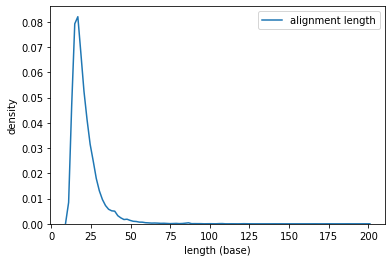

In [118]:
import seaborn as sb
#dfBlastOut['alignment length'].hist(bins=50)
sb.kdeplot(dfBlastOut['alignment length'])
plt.xlabel('length (base)')
plt.ylabel('density')
plt.show()

In [119]:
dicFa_query = fasta2dic('./RubberTreePromoterFasta.fa')
dicFa_subject = fasta2dic('./PLPR_all_d.fasta')

In [120]:
dfBlastOut['HitSequence_query']=dfBlastOut.apply(lambda x : dicFa_query[x['query acc.ver']][x['q. start']:x['q. end']], axis=1)

In [121]:
def get_subject_seq(x):
    if x['s. start'] < x['s. end']:
        return dicFa_subject[x['subject acc.ver']][x['s. start']:x['s. end']]
    else:
        return getRevComp(dicFa_subject[x['subject acc.ver']][x['s. end']:x['s. start']].upper())

In [122]:
dfBlastOut['HitSequence_subject']=dfBlastOut.apply(lambda x : get_subject_seq(x), axis=1)

In [123]:
dfBlastOut.head()

,query acc.ver,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,HitSequence_query,HitSequence_subject
0,rna-XM_021809960.1,PLPR0110..AC:X78988..OS:Zea,100.000,16,0,0,53,68,175,190,0.054,30.1,tctataaatacctcA,tctataaatacctca
1,rna-XM_021810148.1,PLPR0135..AC:X52908..OS:Ricinus,100.000,16,0,0,44,59,90,75,0.054,30.1,AACTTATAAATTAAT,TAACTTATAAATTAA
2,rna-XM_021810148.1,PLPR0135..AC:X52908..OS:Ricinus,100.000,14,0,0,72,85,90,77,0.660,26.5,AACTTATAAATTA,TAACTTATAAATT
3,rna-XM_021800527.1,PLPR0369..AC:Y12859.1..OS:Lotus,89.474,19,2,0,421,439,41,23,0.660,26.5,TTTCTATAATTTCCTAAA,TTTTTTTTAATTTCCTAA
4,rna-XM_021809421.1,PLPR0290..AC:AJ250498..OS:Vicia,94.118,17,1,0,31,47,21,5,0.660,27.4,TGAAATTCAATTGCTT,GTCAAATTCAATTGCT


In [124]:
dfBlastOut.columns

Index(['query acc.ver', 'subject acc.ver', '% identity', 'alignment length',
       'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end',
       'evalue', 'bit score', 'HitSequence_query', 'HitSequence_subject'],
      dtype='object')

In [125]:
dfBlastOut_curated = dfBlastOut[['query acc.ver', 'subject acc.ver', '% identity', 'q. start', 'q. end','alignment length','HitSequence_query', 'HitSequence_subject']]

In [126]:
dfBlastOut_curated

,query acc.ver,subject acc.ver,% identity,q. start,q. end,alignment length,HitSequence_query,HitSequence_subject
0,rna-XM_021809960.1,PLPR0110..AC:X78988..OS:Zea,100.000,53,68,16,tctataaatacctcA,tctataaatacctca
1,rna-XM_021810148.1,PLPR0135..AC:X52908..OS:Ricinus,100.000,44,59,16,AACTTATAAATTAAT,TAACTTATAAATTAA
2,rna-XM_021810148.1,PLPR0135..AC:X52908..OS:Ricinus,100.000,72,85,14,AACTTATAAATTA,TAACTTATAAATT
3,rna-XM_021800527.1,PLPR0369..AC:Y12859.1..OS:Lotus,89.474,421,439,19,TTTCTATAATTTCCTAAA,TTTTTTTTAATTTCCTAA
4,rna-XM_021809421.1,PLPR0290..AC:AJ250498..OS:Vicia,94.118,31,47,17,TGAAATTCAATTGCTT,GTCAAATTCAATTGCT
...,...,...,...,...,...,...,...,...
64639,rna-XM_021808837.1,PLPR0548..AC:AJ536577.1..OS:Lycopersicon,90.476,15,34,21,TCAAACTCTACCAATACAA,tcaaatcactaccaatacaa
64640,rna-XM_021808837.1,PLPR0548..AC:AJ536577.1..OS:Lycopersicon,90.476,117,136,21,TCAAACTCTACCAATACAA,tcaaatcactaccaatacaa
64641,rna-XM_021808836.1,PLPR0548..AC:AJ536577.1..OS:Lycopersicon,90.476,15,34,21,TCAAACTCTACCAATACAA,tcaaatcactaccaatacaa
64642,rna-XM_021808836.1,PLPR0548..AC:AJ536577.1..OS:Lycopersicon,90.476,117,136,21,TCAAACTCTACCAATACAA,tcaaatcactaccaatacaa


In [127]:
dfBlastOut_curated.shape

(64644, 8)

In [129]:
dfBlastOut_curated.head(10)

,query acc.ver,subject acc.ver,% identity,q. start,q. end,alignment length,HitSequence_query,HitSequence_subject
0,rna-XM_021809960.1,PLPR0110..AC:X78988..OS:Zea,100.000,53,68,16,tctataaatacctcA,tctataaatacctca
1,rna-XM_021810148.1,PLPR0135..AC:X52908..OS:Ricinus,100.000,44,59,16,AACTTATAAATTAAT,TAACTTATAAATTAA
2,rna-XM_021810148.1,PLPR0135..AC:X52908..OS:Ricinus,100.000,72,85,14,AACTTATAAATTA,TAACTTATAAATT
3,rna-XM_021800527.1,PLPR0369..AC:Y12859.1..OS:Lotus,89.474,421,439,19,TTTCTATAATTTCCTAAA,TTTTTTTTAATTTCCTAA
4,rna-XM_021809421.1,PLPR0290..AC:AJ250498..OS:Vicia,94.118,31,47,17,TGAAATTCAATTGCTT,GTCAAATTCAATTGCT
5,rna-XM_021830226.1,PLPR0290..AC:AJ250498..OS:Vicia,94.118,242,258,17,TGAAATTCAATTGCTT,GTCAAATTCAATTGCT
6,rna-XM_021816348.1,PLPR0290..AC:AJ250498..OS:Vicia,94.118,242,258,17,TGAAATTCAATTGCTT,GTCAAATTCAATTGCT
7,rna-XM_021779246.1,PLPR0290..AC:AJ250498..OS:Vicia,94.118,242,258,17,TGAAATTCAATTGCTT,GTCAAATTCAATTGCT
8,rna-XM_021823243.1,PLPR0290..AC:AJ250498..OS:Vicia,94.118,242,258,17,TGAAATTCAATTGCTT,GTCAAATTCAATTGCT
9,rna-XM_021789920.1,PLPR0408..AC:D86594.1..OS:Canavalia,94.444,66,83,18,TAATTTTGAAAGGATAA,ATAATTTTGAAAAGATA


In [153]:
promoterInfo = ! cat PLPR_all_d.fasta | grep '>'

In [166]:
## 실행안되서 삭제함. 나는 왜 되는거지?? 
'''
dic = {
    'promoterID':[],
    'geneBank':[],
    'Organism':[],
    'GeneName':[],
    'Product':[],
    'PromoterRange':[],
    'CDS':[],
    'Info':[],
}

for each in promoterInfo[0:2]:
    eachList = each.split('..')
    dic['promoterID'].append(eachList[0])
    dic['geneBank'].append(eachList[1])
    dic['Organism'].append(eachList[2])
    dic['GeneName'].append(eachList[3])
    dic['Product'].append(eachList[4])
    dic['PromoterRange'].append(eachList[5])
    dic['CDS'].append(eachList[6])
    dic['Info'].append(eachList[7])
'''
dic = {
    'ID':[],
    'AC':[],
    'OS':[],
    'GENE':[],
    'CDS':[],
    'Taxon':[],
    'Promoter':[]
}

for each in promoterInfo:
    eachList1 = each.split('|')
    eachList2 = eachList[0].split('..')
    eachList = eachList2 + eachList1[1:]
    eachListTmp = [x.split(':') for x in eachList if ':' in x]
    tmpDict = dict([x for x in eachListTmp if len(x) ==2])
    
    dic['ID'].append(eachList[0].replace('>',''))
    
    try :
        dic['AC'].append(tmpDict['AC'])
    except KeyError:
        dic['AC'].append('NA')
    try :
        dic['OS'].append(tmpDict['OS'])
    except KeyError:
        dic['OS'].append('NA')
    try :
        dic['GENE'].append(tmpDict['GENE'])
    except KeyError:
        dic['GENE'].append('NA')
    try :
        dic['CDS'].append(tmpDict['CDS'])
    except KeyError:
        dic['CDS'].append('NA')
    try :
        dic['Taxon'].append(tmpDict['Taxon'])
    except KeyError:
        dic['Taxon'].append('NA')
    try :
        dic['Promoter'].append(tmpDict['Promoter'])
    except KeyError:
        dic['Promoter'].append('NA')


In [167]:
dfPlantPromoterDB = pd.DataFrame(dic)

In [168]:
dfPlantPromoterDB

,ID,AC,OS,GENE,CDS,Taxon,Promoter
0,PLPR0004,NA,NA,NA,NA,Dicot,TATA
1,PLPR0004,NA,NA,NA,NA,Dicot,TATA
2,PLPR0004,NA,NA,NA,NA,Dicot,TATA
3,PLPR0004,NA,NA,NA,NA,Dicot,TATA
4,PLPR0004,NA,NA,NA,NA,Dicot,TATA
...,...,...,...,...,...,...,...
571,PLPR0004,NA,NA,NA,NA,Other Plants,TATA-less
572,PLPR0004,NA,NA,NA,NA,Other Plants,TATA-less
573,PLPR0004,NA,NA,NA,NA,Other Plants,TATA-less
574,PLPR0004,NA,NA,NA,NA,Other Plants,TATA-less


In [ ]:
#동영상 33분까지 따라옴. ^^;;;;; 결과가 모두  NA 다시 체크